# Data Preprocessing

In [ ]:
import re
import pandas as pd
from contractions import fix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
sns.set()

## X dataset

In [ ]:
x_df = pd.read_csv('../data/annotated/annotated_x_data.csv')
x_df.info()

In [ ]:
x_df.describe()

In [ ]:
x_df.isnull().sum()

In [ ]:
print(f"Duplicates: {x_df.duplicated().sum()}")

In [ ]:
x_df.drop(['Unnamed: 0', 'index'],axis='columns', inplace=True)

In [ ]:
x_df

In [ ]:
def censor_words(text, banned_words):
    def censor_match(match):
        word = match.group(0)
        censored_word = re.sub(r'([aeiouAEIOU])', '*', word, count=1)
        return censored_word

    pattern = r"\b(" + "|".join(re.escape(word) for word in banned_words) + r")\b"
    return re.sub(pattern, censor_match, text, flags=re.IGNORECASE)


In [ ]:
from wordcloud import WordCloud

text_data = " ".join(x_df["Full_Text"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("X Word Cloud Before Text Processing", fontsize=14)
plt.show()

In [ ]:
def clean_text(text):
    """
    Function that removes @, special characters or hashtags.
    """
    text = text.lower()
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text.strip()

x_df["cleaned_text"] = x_df["Full_Text"].astype(str).apply(clean_text)
x_df.tail(30)

In [ ]:
from wordsegment import load, segment

load()

def fix_hashtags(text):
    words = text.split()
    processed_words = []
    
    for word in words:
        if word.startswith("#"):
            clean_word = word[1:]  
            
            if re.search(r'[A-Z]', clean_word):
                clean_word = re.sub(r'([a-z])([A-Z])', r'\1 \2', clean_word)
            else:
                clean_word = " ".join(segment(clean_word))
            
            processed_words.append(clean_word)
        else:
            processed_words.append(word)

    return " ".join(processed_words)

x_df["cleaned_text"] = x_df["cleaned_text"].astype(str).apply(fix_hashtags)
x_df

In [ ]:
x_df["cleaned_text"] = x_df["cleaned_text"].apply(fix)
x_df

In [ ]:
x_df["tokens"] = x_df["cleaned_text"].apply(word_tokenize)
print(x_df[["cleaned_text", "tokens"]].head())

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
x_df["tokens"] = x_df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])

In [ ]:
lemmatizer = WordNetLemmatizer()

x_df["tokens"] = x_df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])
x_df["processed_text"] = x_df["tokens"].apply(lambda words: ' '.join(words))

In [ ]:
x_df.head()

In [ ]:
x_df[["processed_text", "label"]].to_csv("../data/processed/processed_x_dataset.csv", index=False)

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(x_df["processed_text"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}
censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,
    regexp=r"\b[a-zA-Z*]+\b"   
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("X Word Cloud After Text Processing", fontsize=14)
plt.show()


In [ ]:
class_count = x_df['label'].value_counts()
plt.figure(figsize=(7,5))
bars = class_count.plot(kind='bar', color=['lightgreen','orange','red'])

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
    
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution for the Scraped X Dataset")
plt.xticks(rotation=0)
plt.show()

## Reddit dataset

In [ ]:
reddit_df = pd.read_csv("../data/annotated/annotated_reddit_data.csv")
reddit_df.info()

In [ ]:
reddit_df.describe()

In [ ]:
reddit_df.isnull().sum()

In [ ]:
print(f"Duplicates: {reddit_df.duplicated().sum()}")

In [ ]:
from wordcloud import WordCloud

text_data = " ".join(reddit_df["comment"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reddit Word Cloud Before Text Processing", fontsize=14)
plt.show()

In [ ]:
reddit_df["cleaned_text"] = reddit_df["comment"].astype(str).apply(clean_text)
reddit_df.tail(30)

In [ ]:
reddit_df["cleaned_text"] = reddit_df["cleaned_text"].astype(str).apply(fix_hashtags)
reddit_df

In [ ]:
reddit_df["cleaned_text"] = reddit_df["cleaned_text"].apply(fix)
reddit_df

In [ ]:
reddit_df["tokens"] = reddit_df["cleaned_text"].apply(word_tokenize)
print(reddit_df[["cleaned_text", "tokens"]].head())

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.discard("not")
reddit_df["tokens"] = reddit_df["tokens"].apply(lambda words: [w for w in words if w not in stop_words])
reddit_df["tokens"]

In [ ]:
lemmatizer = WordNetLemmatizer()

reddit_df["tokens"] = reddit_df["tokens"].apply(lambda words: [lemmatizer.lemmatize(w) for w in words])
reddit_df["processed_text"] = reddit_df["tokens"].apply(lambda words: ' '.join(words))
reddit_df["processed_text"].tail(30)

In [ ]:
to_be_removed = ["removed","deleted"]

bad_values = reddit_df["processed_text"].value_counts().loc[to_be_removed]
plt.figure(figsize=(7,5))
bars = bad_values.plot(kind='bar', color=['lightblue','orange'])
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
plt.xlabel('Type of record')
plt.ylabel('Count')
plt.title('No. of rows scraped from Reddit that have been removed or deleted')
plt.xticks(rotation=0)
plt.show()



In [ ]:
reddit_df = reddit_df[~reddit_df["processed_text"].isin(to_be_removed)]
reddit_df

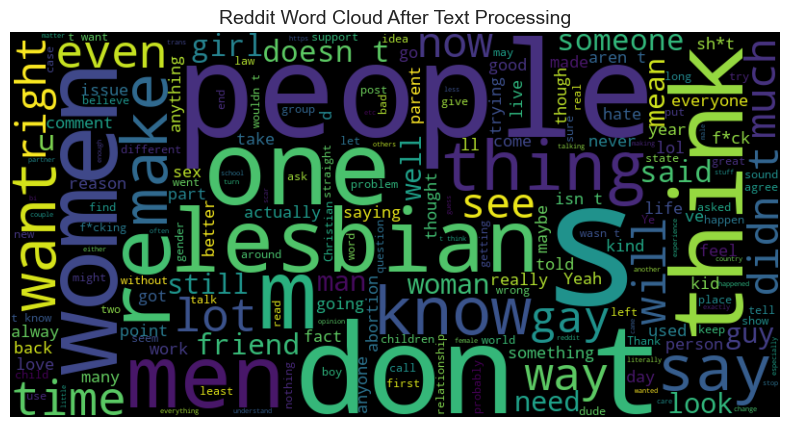

In [117]:
from wordcloud import WordCloud

text_data = " ".join(reddit_df["comment"].astype(str))
banned_words = {"fuck", "fucking", "shit", "bitch", "faggot", "nigga"}

censored_text = censor_words(text_data, banned_words)

wordcloud = WordCloud(
    width=800, height=400,
    background_color="black",
    colormap="viridis",
    max_words=200,  
    regexp=r"\b[a-zA-Z*]+\b" 
).generate(censored_text)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Reddit Word Cloud After Text Processing", fontsize=14)
plt.show()

In [ ]:
reddit_class = reddit_df['label'].value_counts()

In [ ]:
plt.figure(figsize=(7,5))
reddit_bar = reddit_class.plot(kind='bar', color=['lightgreen','orange','red'])
for bar in reddit_bar.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height(), 
             f"{bar.get_height():,}",
             ha="center", va="bottom", fontsize=10)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title("Class Distribution for the Scraped Reddit Dataset")
plt.xticks(rotation=0)
plt.show()